In [1]:
import functions as f
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import importlib
importlib.reload(f)

daily_omega = r"C:\\physics_masters\\data\\Bossa public market data\\pub\\daily\\omega\\"


# Results for diff returns (adjusted for inflation)

In [2]:
importlib.reload(f)
dataframes = f.load_data_pol(daily_omega)
df_concat = f.concat_and_select(dataframes, 0.99, cpi_file='CPI_POL.csv') #0.99
df_concat, index_series = f.calculate_returns(df_concat, 'diff')

% of stocks remaining: 12.50%
% of dates remaining: 99.89%
Number of stocks: 50
Number of dates: 3612
% of nans: 0.60%


<Axes: xlabel='Date'>

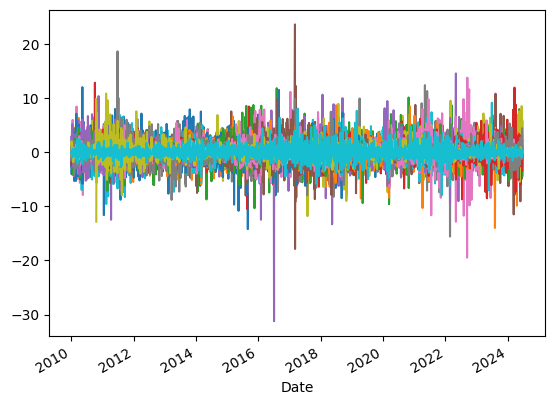

In [3]:
df_concat.plot(legend=False)

<I^2> = 0.1196
rho_0*sigma2_0 = 0.0666


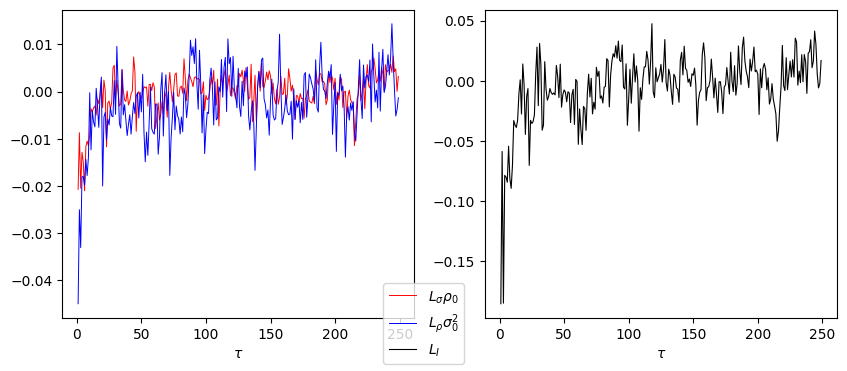

In [4]:
importlib.reload(f)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
data = f.calculate_correlation_functions(df_concat, index_series)

f.plot_correlation_functions(data, fig, ax)

# Results for log returns

In [3]:
df_concat = f.concat_and_select(dataframes, 0.99) #0.99
df_concat, index_series = f.calculate_returns(df_concat, 'log')


% of stocks remaining: 12.50%
% of dates remaining: 99.89%
Number of stocks: 50
Number of dates: 3612
% of nans: 0.60%


In [4]:
df_concat.columns

Index(['ACTION', 'AGORA', 'AMBRA', 'AMICA', 'AMREST', 'APATOR', 'ARCTIC',
       'ASBIS', 'ASSECOPOL', 'ASTARTA', 'ATMGRUPA', 'BETACOM', 'BIOTON',
       'BOGDANKA', 'BORYSZEW', 'BUDIMEX', 'BUMECH', 'CCC', 'COGNOR', 'COMARCH',
       'CORMAY', 'CYFRPLSAT', 'DECORA', 'DOMDEV', 'ECHO', 'ENEA', 'ERBUD',
       'EUROCASH', 'FORTE', 'GETIN', 'GTC', 'PEKAO', 'PGE', 'PKNORLEN',
       'PKOBP', 'POLIMEXMS', 'PULAWY', 'RAFAKO', 'RAINBOW', 'ROPCZYCE',
       'SANOK', 'STALEXP', 'STALPROD', 'SYGNITY', 'TESGAS', 'TRAKCJA',
       'UNIBEP', 'VINDEXUS', 'WASKO', 'WIELTON'],
      dtype='object')

<Axes: xlabel='Date'>

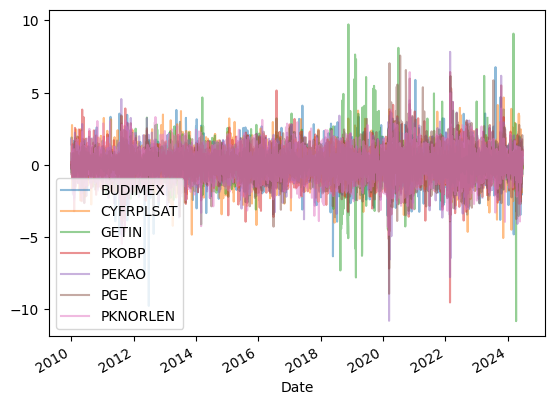

In [ ]:
df_concat[['BUDIMEX', 'CYFRPLSAT', 'GETIN' ,'PKOBP', 'PEKAO', 'PGE', 'PKNORLEN' ]].plot(alpha=0.5, ylabel='Log returns of stock prices')

<I^2> = 0.1499
rho_0*sigma2_0 = 0.0758
rho_0 = 0.0758, sigma2_0 = 1.0000


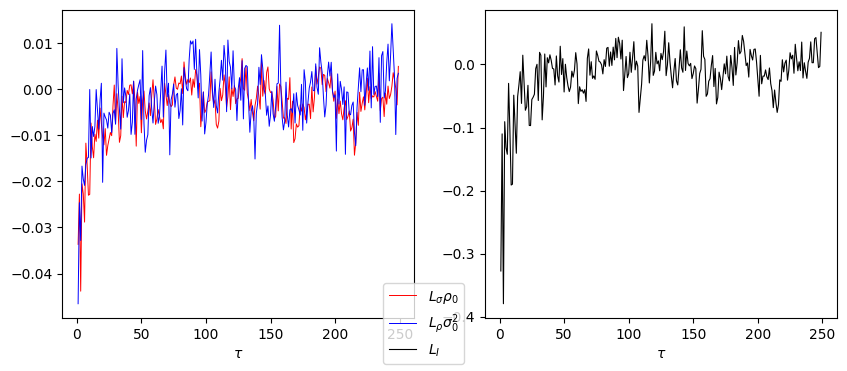

In [11]:
importlib.reload(f)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
data = f.calculate_correlation_functions(df_concat, index_series)

f.plot_correlation_functions(data, fig, ax)

# With real index WIG

% of stocks remaining: 100.00%
% of dates remaining: 100.00%
Number of stocks: 1
Number of dates: 3609
% of nans: 0.03%
<I^2> = 0.9997
rho_0*sigma2_0 = 0.0666


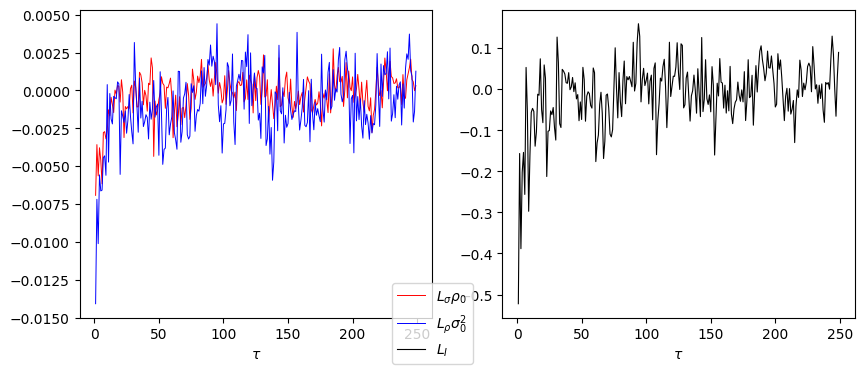

In [7]:
I = pd.read_csv('C:/physics_masters/data/Bossa public market data/pub/daily/omega/WIG.prn', delimiter=',', header=0, parse_dates=['Date'], usecols=['Date', 'Close'])
I.set_index('Date', inplace=True)
I.rename(columns={"Close": 'WIG'}, inplace=True)
I = f.concat_and_select([I])
I, _ = f.calculate_returns(I)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
data = f.calculate_correlation_functions(df_concat, I['WIG'])

f.plot_correlation_functions(data, fig, ax)